# Polynominal regression

## Task

- Load dataset with sizes and prices
- Explore and display the data
- Create a linear model and find out its R2
- Create polynomial models with different degrees, find their R2
- Select the best model 

# Data loading

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Victor\AppData\Local\Temp\ipykernel_22996\3190195622.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv ("..\dataset\prices.csv",  sep=';')


# Linear model
- standardize the data
- create and train a linear model
- display model parameters
- visualize the linear model
- display model scores

        Size       Price
0   51.00000   901.18810
1   70.36735   972.23867
2   89.73469  1001.99394
3  109.10204  1024.90830
4  128.46939  1053.72491
              Size        Price
count    62.000000    62.000000
mean    641.704081  1327.839685
std     349.418285   148.292994
min      51.000000   901.188100
25%     346.352037  1241.288570
50%     641.704085  1358.216850
75%     937.056123  1447.718920
max    1232.408156  1527.818240


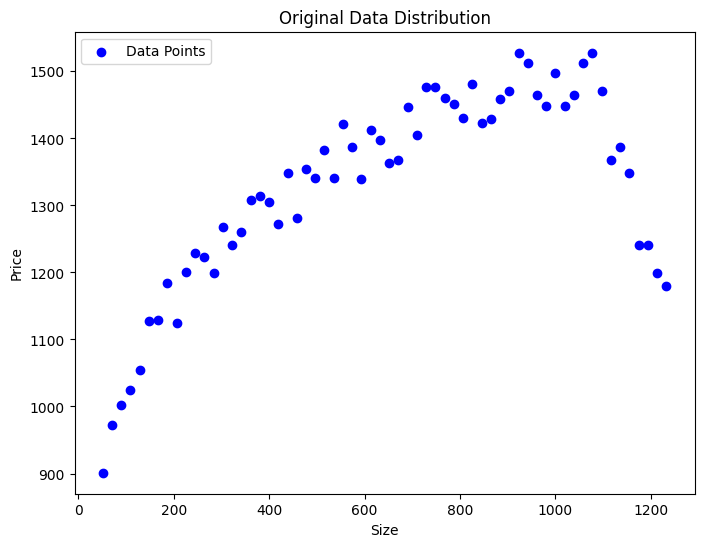

Linear Model R2 Score: 0.4020


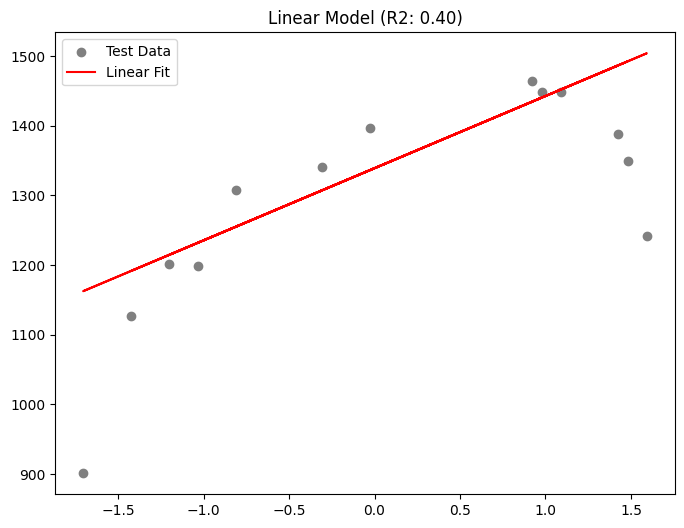

In [7]:
#First some data analysis
print(data.head())
print(data.describe())

# Visualizing the raw data
plt.figure(figsize=(8, 6))
plt.scatter(data['Size'], data['Price'], color='blue', label='Data Points')
plt.title("Original Data Distribution")
plt.xlabel("Size")
plt.ylabel("Price")
plt.legend()
plt.show()

# Preparation
X = data[['Size']].values
y = data['Price'].values

# Standardization (Optional for simple 1D, but good practice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train linear model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Model R2 Score: {r2_lin:.4f}")

# Visualize Linear Model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='gray', label='Test Data')
plt.plot(X_test, y_pred_lin, color='red', label='Linear Fit')
plt.title(f"Linear Model (R2: {r2_lin:.2f})")
plt.legend()
plt.show()

# Create a polynomial regression model
- create a polynomial 1D model with steps 2 - 8
- display models
- display their parameters
- show their scores
- Which model would you choose?

Degree 2 -> Train R2: 0.8643, Test R2: 0.9277
Degree 3 -> Train R2: 0.8874, Test R2: 0.9139
Degree 4 -> Train R2: 0.9468, Test R2: 0.9702
Degree 5 -> Train R2: 0.9499, Test R2: 0.9630
Degree 6 -> Train R2: 0.9500, Test R2: 0.9658
Degree 7 -> Train R2: 0.9522, Test R2: 0.9612
Degree 8 -> Train R2: 0.9592, Test R2: 0.9197


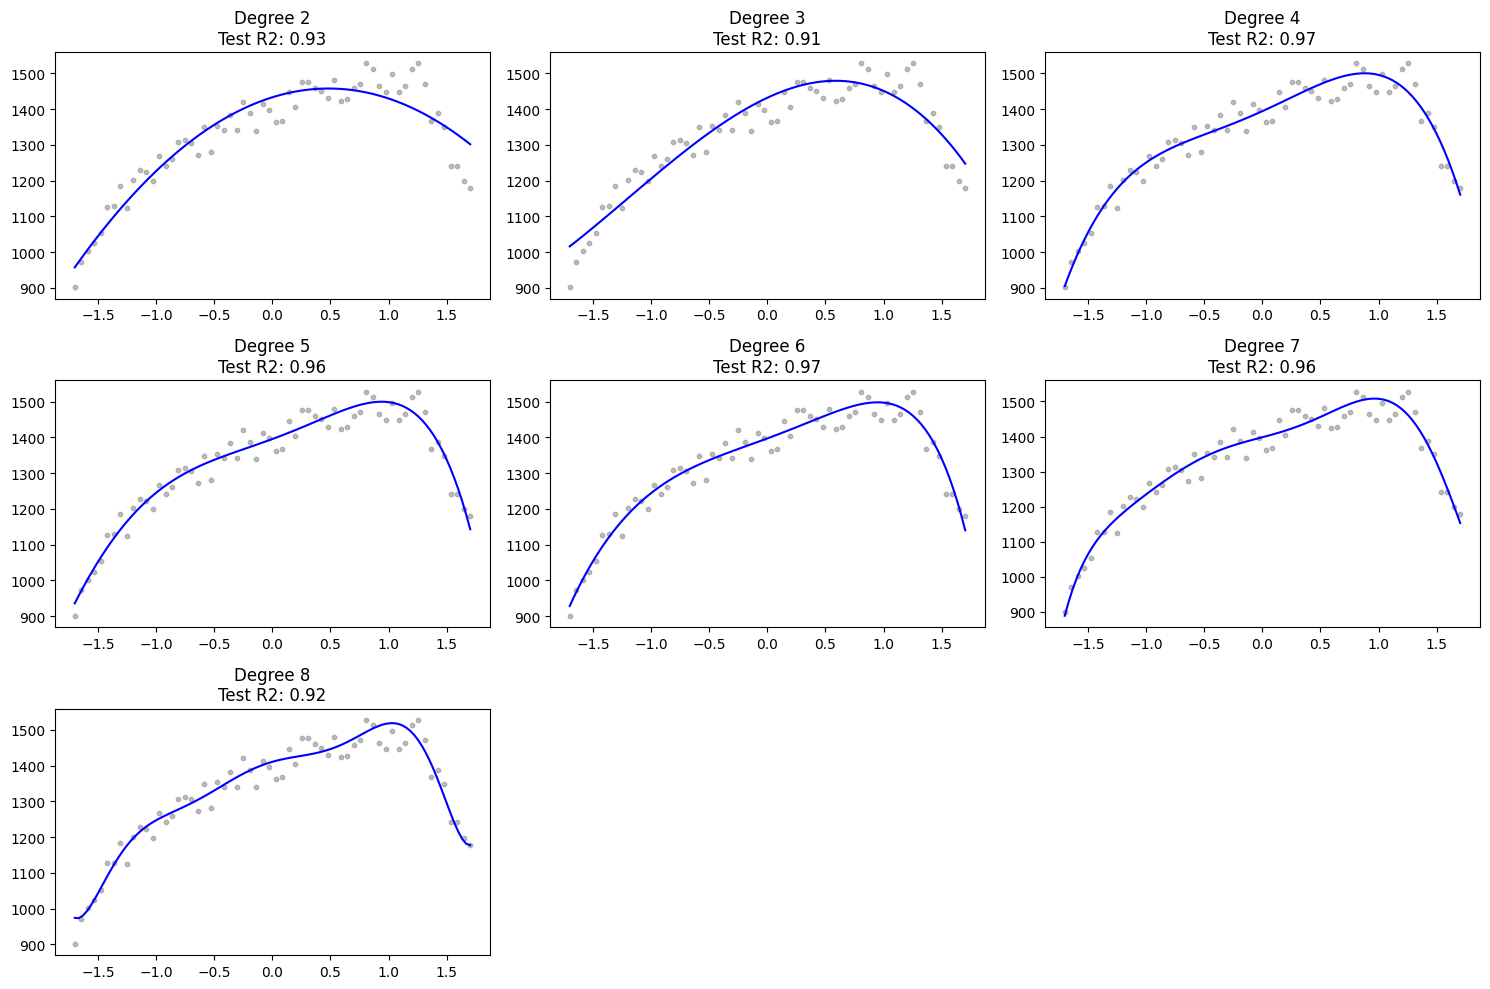

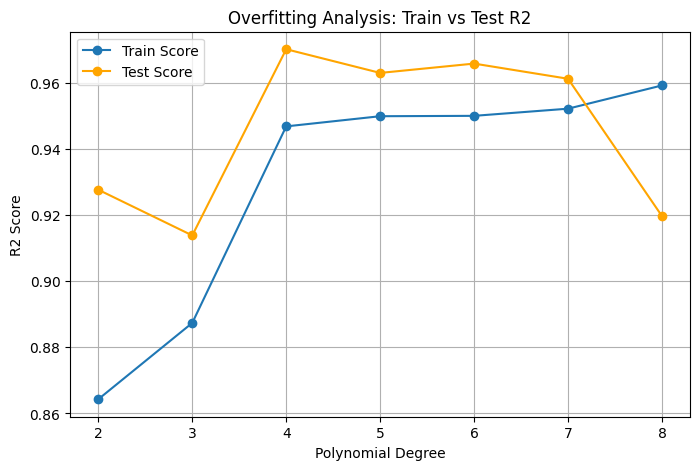

The best model is Degree 4 with Test R2: 0.9702


In [8]:
degrees = range(2, 9) # Degrees 2 to 8
train_scores = []
test_scores = []

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # 1. Create Polynomial Features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_scaled)
    
    # 2. Split Data (Using same random state to be comparable)
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    # 3. Train Linear Regression on Poly features
    poly_model = LinearRegression()
    poly_model.fit(X_train_p, y_train_p)
    
    # 4. Evaluate
    train_r2 = poly_model.score(X_train_p, y_train_p)
    test_r2 = poly_model.score(X_test_p, y_test_p)
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    
    print(f"Degree {degree} -> Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")
    
    # 5. Visualization (Subplots)
    plt.subplot(3, 3, i+1)
    plt.scatter(X_scaled, y, color='gray', s=10, alpha=0.5)
    
    # Generate smooth line for plotting
    X_range = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
    y_range_pred = poly_model.predict(poly.transform(X_range))
    
    plt.plot(X_range, y_range_pred, color='blue')
    plt.title(f"Degree {degree}\nTest R2: {test_r2:.2f}")

plt.tight_layout()
plt.show()

# Plotting Train vs Test Score to find optimal degree (Bias-Variance Tradeoff)
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_scores, label='Train Score', marker='o')
plt.plot(degrees, test_scores, label='Test Score', marker='o', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Overfitting Analysis: Train vs Test R2')
plt.legend()
plt.grid(True)
plt.show()

# Logic to select best model (Highest Test Score)
best_degree_idx = np.argmax(test_scores)
best_degree = degrees[best_degree_idx]
print(f"The best model is Degree {best_degree} with Test R2: {test_scores[best_degree_idx]:.4f}")